# Implementation of Inception module using keras with Functional API  
![module image](https://www.researchgate.net/profile/Bo-Zhao-67/publication/312515254/figure/fig3/AS:489373281067012@1493687090916/nception-module-of-GoogLeNet-This-figure-is-from-the-original-paper-10.png) 

In [1]:
from keras import Input,Sequential,Model

from keras.layers import Dense,Flatten,Dropout,Conv2D,AvgPool2D,GlobalAveragePooling2D,Concatenate,MaxPool2D,Add

import keras.backend as K

from keras.losses import mean_squared_error,CategoricalCrossentropy

from keras.metrics import Accuracy,CategoricalAccuracy,RootMeanSquaredError,AUC

from keras.optimizers import SGD,Adam,RMSprop

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping

import keras.utils as U

In [3]:
In = Input(shape=(28,28,480),name="Previous Layer")

one_by_one = Conv2D(filters=100,kernel_size=1,strides=3,activation='relu',padding='same')(In)

x1 = Conv2D(filters=100,kernel_size=1,strides=3,activation='relu',padding='same')(In)
three_by_three = Conv2D(filters=200,kernel_size=3,activation='relu',padding='same')(x1)

x2 = Conv2D(filters=100,kernel_size=1,strides=3,activation='relu',padding='same')(In)
five_by_five = Conv2D(filters=150,kernel_size=5,activation='relu',padding='same')(x2)

x3 = MaxPool2D(pool_size=3,padding="same")(In)
one_by_one2 = Conv2D(filters=100,kernel_size=1,activation='relu',padding='same')(x3)

out = Concatenate()([one_by_one,three_by_three,five_by_five,one_by_one2])

model = Model(inputs=In, outputs=out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Previous Layer (InputLayer)     [(None, 28, 28, 480) 0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 10, 10, 100)  48100       Previous Layer[0][0]             
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 10, 10, 100)  48100       Previous Layer[0][0]             
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 10, 10, 480)  0           Previous Layer[0][0]             
____________________________________________________________________________________________

# Result

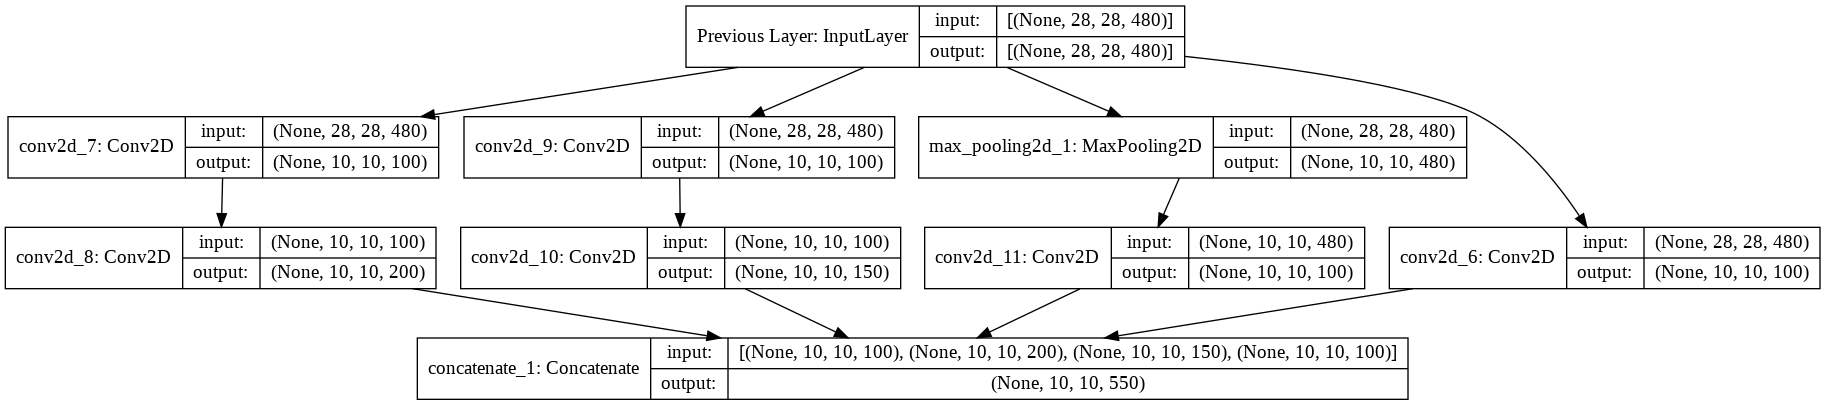

In [4]:
U.plot_model(model, "filename.png", show_shapes=True)